In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('medical_comps.csv')
df

,Unnamed: 0,St. Michael Total,Unnamed: 2,St. Michael Tower Only,St. Michael Stumpy,Comp 1 Forest C,Forest B,MC Auburn,Covington Expansion,Rainier,Milgard,SMC NW Tower
0,Skin to Gross,1.21,NaN,1.05,0.74,0.44,0.48,0.89,0.53,0.43,0.60,0.35
1,GSFS/GSF,1.38,NaN,1.45,1.50,1.23,1.23,2.64,1.55,1.06,1.00,1.11
2,Roof SF/GSF,0.23,NaN,0.23,0.27,0.10,0.14,0.64,0.55,0.17,0.47,0.08
3,GSF/Bed - Typ Floor,705,NaN,705,705,1187,1162,649,775,960,1012,939
4,CY Fnd Conc/GSF,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,GVSF,"83,560",NaN,"60,736","37,965","220,168","153,686","22,528","40,271","54,273","30,653","277,708"
6,GSF,"69,060",NaN,"58,080","51,040","497,760","323,144","25,234","76,406","125,321","51,134","791,737"
7,GSFS,"95,528",NaN,"84,498","76,494","610,831","395,900","66,512","118,462","133,447","51,134","878,785"
8,SFED - Steel,"78,545",NaN,"67,515","51,040","491,078","301,988","32,107","73,080","133,447","51,134","865,787"
9,SFED - Conc,0,NaN,0,0,"12,679","60,140",0,0,0,0,0


In [68]:
df_a = df.iloc[np.r_[5:8, 18, 3], [0,1,5,7,9]].copy()
df_a = df_a.transpose()
new_header = df_a.iloc[0]
df_a = df_a[1:]
df_a.columns = new_header
df_a = df_a.replace(',', '', regex=True)
df_a = df_a.apply(pd.to_numeric)
df_a

Unnamed: 0,GVSF,GSF,GSFS,Roof Area,GSF/Bed - Typ Floor
St. Michael Total,83560,69060,95528,15852,705
Comp 1 Forest C,220168,497760,610831,50555,1187
MC Auburn,22528,25234,66512,16056,649
Rainier,54273,125321,133447,21559,960


In [22]:
df_x = df_a.iloc[0:4, 0:4].copy()
df_x = df_x.replace(',', '', regex=True)
df_x = df_x.apply(pd.to_numeric)
df_x = df_x.values.tolist()
df_x

[[83560, 69060, 95528, 15852],
 [220168, 497760, 610831, 50555],
 [22528, 25234, 66512, 16056],
 [54273, 125321, 133447, 21559]]

In [14]:

df_y = df.iloc[3, [1,5,7,9]].copy()
df_y = df_y.apply(pd.to_numeric)
df_y = df_y.to_numpy()
df_y

array([ 705, 1187,  649,  960], dtype=int64)

In [77]:

s = np.linalg.solve(df_x, df_y)
s

array([ 0.00157321,  0.00375791, -0.00663472,  0.05979198])

In [23]:
df_a.iloc[1,0]*0.001573+df_a.iloc[1,1]*0.003758+df_a.iloc[1,2]*-0.006635+df_a.iloc[1,3]*0.059792

1186.8272189999998

In [6]:
lol = df_a.values.tolist()
lol

[[83560, 69060, 95528, 15852, 705],
 [220168, 497760, 610831, 50555, 1187],
 [22528, 25234, 66512, 16056, 649],
 [54273, 125321, 133447, 21559, 960]]

In [9]:
from sympy import *

M = Matrix(lol)
print('matrix : {} '.format(M))
M_rref = M.rref()
print('reduced row echelon form and the pivot columns : {}'.format(M_rref))

matrix : Matrix([[83560, 69060, 95528, 15852, 705], [220168, 497760, 610831, 50555, 1187], [22528, 25234, 66512, 16056, 649], [54273, 125321, 133447, 21559, 960]]) 
reduced row echelon form and the pivot columns : (Matrix([
[1, 0, 0, 0,   1844265233160649/1172291532260993106],
[0, 1, 0, 0,    1468455817258481/390763844086997702],
[0, 0, 1, 0, -15555652279797655/2344583064521986212],
[0, 0, 0, 1, 140187260488738255/2344583064521986212]]), (0, 1, 2, 3))


In [10]:
r = M_rref[0]
r

Matrix([
[1, 0, 0, 0,   1844265233160649/1172291532260993106],
[0, 1, 0, 0,    1468455817258481/390763844086997702],
[0, 0, 1, 0, -15555652279797655/2344583064521986212],
[0, 0, 0, 1, 140187260488738255/2344583064521986212]])

In [11]:
X = np.array(M_rref[0][0:4,0:4])
X

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=object)

In [75]:
Y = np.array(M_rref[0][0:4,4]).astype(float)
Y

array([[ 0.00157321],
       [ 0.00375791],
       [-0.00663472],
       [ 0.05979198]])

In [13]:
np.hstack((X,Y))

array([[1, 0, 0, 0, 0.0015732138144882984],
       [0, 1, 0, 0, 0.003757911176990959],
       [0, 0, 1, 0, -0.006634720055426632],
       [0, 0, 0, 1, 0.05979197862939424]], dtype=object)

In [31]:
df_b = df.iloc[np.r_[5:8, 18, 3]].copy()
df_b = df_b.transpose()
new_header = df_b.iloc[0]
df_b = df_b[1:]
df_b.columns = new_header
df_b = df_b.replace(',', '', regex=True)
df_b = df_b.apply(pd.to_numeric)
df_b = df_b.dropna(axis=0)
df_b


Unnamed: 0,GVSF,GSF,GSFS,Roof Area,GSF/Bed - Typ Floor
St. Michael Total,83560.0,69060.0,95528.0,15852.0,705.0
St. Michael Tower Only,60736.0,58080.0,84498.0,13646.0,705.0
St. Michael Stumpy,37965.0,51040.0,76494.0,13646.0,705.0
Comp 1 Forest C,220168.0,497760.0,610831.0,50555.0,1187.0
Forest B,153686.0,323144.0,395900.0,44966.0,1162.0
MC Auburn,22528.0,25234.0,66512.0,16056.0,649.0
Covington Expansion,40271.0,76406.0,118462.0,42056.0,775.0
Rainier,54273.0,125321.0,133447.0,21559.0,960.0
Milgard,30653.0,51134.0,51134.0,24277.0,1012.0
SMC NW Tower,277708.0,791737.0,878785.0,63741.0,939.0


In [71]:
df_c = df_b
df_c['number_of_beds'] = df_c['GSF'] / df_c['GSF/Bed - Typ Floor']
df_c

Unnamed: 0,GVSF,GSF,GSFS,Roof Area,GSF/Bed - Typ Floor,number_of_beds
St. Michael Total,83560.0,69060.0,95528.0,15852.0,705.0,97.957447
St. Michael Tower Only,60736.0,58080.0,84498.0,13646.0,705.0,82.382979
St. Michael Stumpy,37965.0,51040.0,76494.0,13646.0,705.0,72.397163
Comp 1 Forest C,220168.0,497760.0,610831.0,50555.0,1187.0,419.342881
Forest B,153686.0,323144.0,395900.0,44966.0,1162.0,278.092943
MC Auburn,22528.0,25234.0,66512.0,16056.0,649.0,38.881356
Covington Expansion,40271.0,76406.0,118462.0,42056.0,775.0,98.588387
Rainier,54273.0,125321.0,133447.0,21559.0,960.0,130.542708
Milgard,30653.0,51134.0,51134.0,24277.0,1012.0,50.527668
SMC NW Tower,277708.0,791737.0,878785.0,63741.0,939.0,843.170394


In [81]:
df_d = df_b
df_d['number_of_beds'] = df_d['GSF'] / (df_d.iloc[:,0]*s[0]+df_d.iloc[:,1]*s[1]+df_d.iloc[:,2]*s[2]+df_d.iloc[:,3]*s[3])
df_d

Unnamed: 0,GVSF,GSF,GSFS,Roof Area,GSF/Bed - Typ Floor,number_of_beds
St. Michael Total,83560.0,69060.0,95528.0,15852.0,705.0,97.957447
St. Michael Tower Only,60736.0,58080.0,84498.0,13646.0,705.0,102.053912
St. Michael Stumpy,37965.0,51040.0,76494.0,13646.0,705.0,91.153289
Comp 1 Forest C,220168.0,497760.0,610831.0,50555.0,1187.0,419.342881
Forest B,153686.0,323144.0,395900.0,44966.0,1162.0,212.868128
MC Auburn,22528.0,25234.0,66512.0,16056.0,649.0,38.881356
Covington Expansion,40271.0,76406.0,118462.0,42056.0,775.0,36.749005
Rainier,54273.0,125321.0,133447.0,21559.0,960.0,130.542708
Milgard,30653.0,51134.0,51134.0,24277.0,1012.0,37.801690
SMC NW Tower,277708.0,791737.0,878785.0,63741.0,939.0,568.417469


In [90]:
df_d.iloc[:,3]
# s[1]

St. Michael Total         15852.0
St. Michael Tower Only    13646.0
St. Michael Stumpy        13646.0
Comp 1 Forest C           50555.0
Forest B                  44966.0
MC Auburn                 16056.0
Covington Expansion       42056.0
Rainier                   21559.0
Milgard                   24277.0
SMC NW Tower              63741.0
Name: Roof Area, dtype: float64

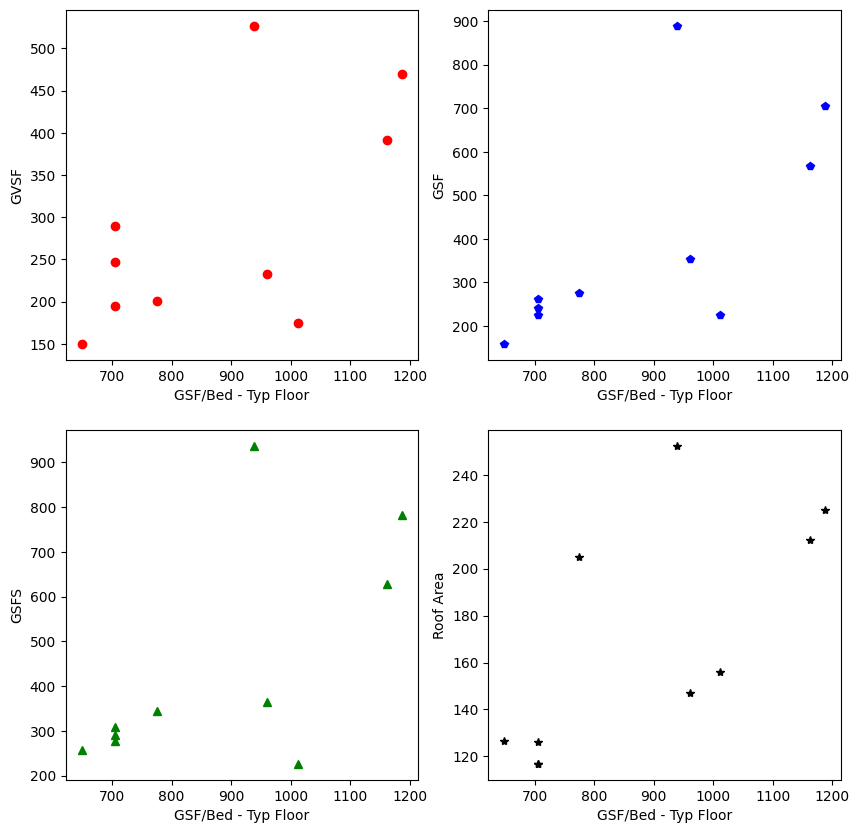

In [61]:
import matplotlib.pyplot as plt
x = df_b.iloc[:,-1:]
y1 = df_b.iloc[:,0:1]
y2 = df_b.iloc[:,1:2]
y3 = df_b.iloc[:,2:3]
y4 = df_b.iloc[:,3:4]
plt.figure().set_size_inches(10,10)
plt.subplot(221)
plt.plot(x, np.sqrt(y1), 'ro')
plt.xlabel(x.columns[0])
plt.ylabel(y1.columns[0])
plt.subplot(222)
plt.plot(x, np.sqrt(y2), 'bp')
plt.xlabel(x.columns[0])
plt.ylabel(y2.columns[0])
plt.subplot(223)
plt.plot(x, np.sqrt(y3), 'g^')
plt.xlabel(x.columns[0])
plt.ylabel(y3.columns[0])
plt.subplot(224)
plt.plot(x, np.sqrt(y4), 'k*')
plt.xlabel(x.columns[0])
plt.ylabel(y4.columns[0])
plt.show()

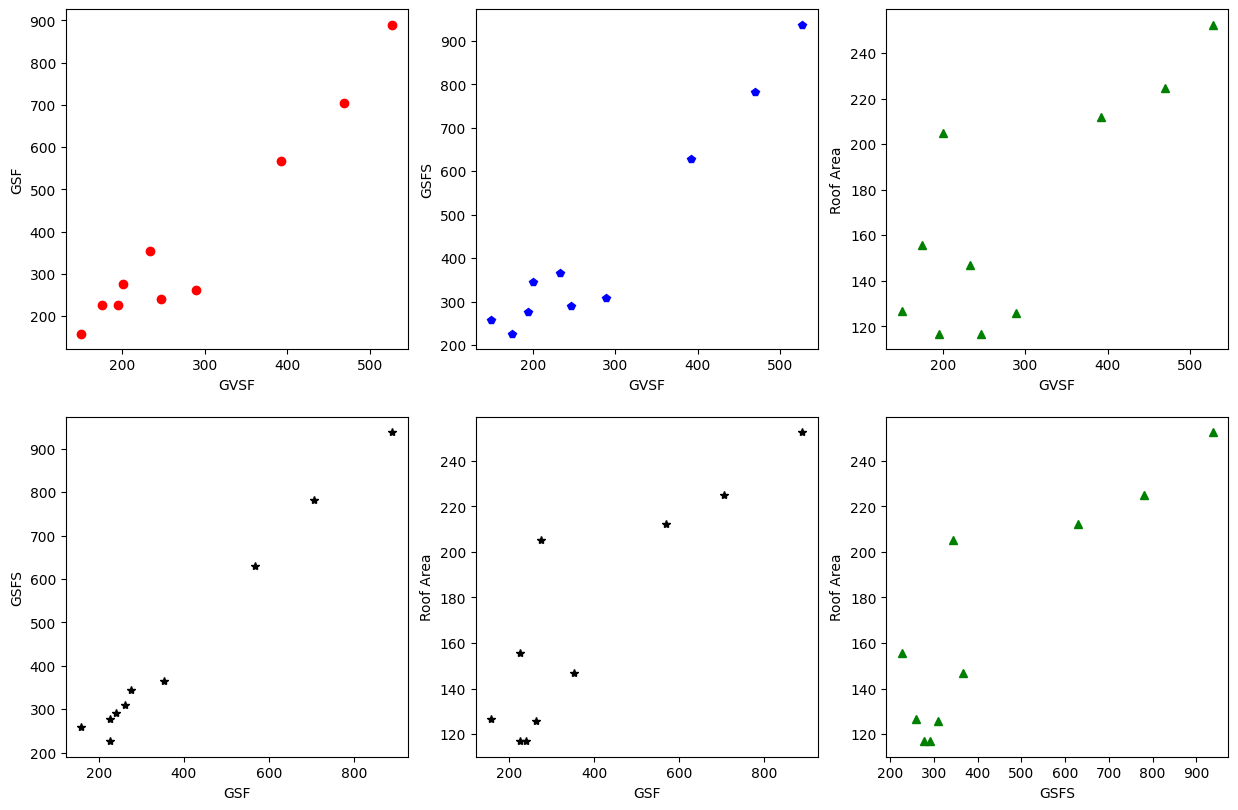

In [64]:
plt.figure().set_size_inches(15,15)
plt.subplot(331)
plt.plot(np.sqrt(y1), np.sqrt(y2), 'ro')
plt.xlabel(y1.columns[0])
plt.ylabel(y2.columns[0])
plt.subplot(332)
plt.plot(np.sqrt(y1), np.sqrt(y3), 'bp')
plt.xlabel(y1.columns[0])
plt.ylabel(y3.columns[0])
plt.subplot(333)
plt.plot(np.sqrt(y1), np.sqrt(y4), 'g^')
plt.xlabel(y1.columns[0])
plt.ylabel(y4.columns[0])
plt.subplot(334)
plt.plot(np.sqrt(y2), np.sqrt(y3), 'k*')
plt.xlabel(y2.columns[0])
plt.ylabel(y3.columns[0])
plt.subplot(335)
plt.plot(np.sqrt(y2), np.sqrt(y4), 'k*')
plt.xlabel(y2.columns[0])
plt.ylabel(y4.columns[0])
plt.subplot(336)
plt.plot(np.sqrt(y3), np.sqrt(y4), 'g^')
plt.xlabel(y3.columns[0])
plt.ylabel(y4.columns[0])
plt.show()